In [28]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# Load the digits dataset
digits = load_digits()


In [3]:
print('Image Data Shape', digits.data.shape)
print('Label Data Shape', digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


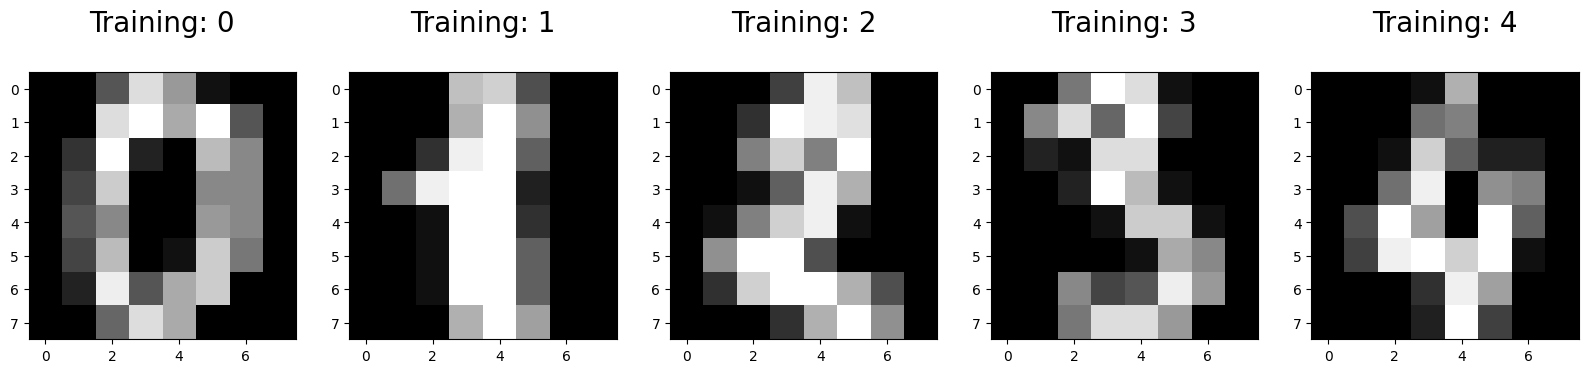

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5,index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

# Create and train a Logistic Regression model
logisticreg = LogisticRegression()
logisticreg.fit(X_train, y_train)

# Predict the target value for a single data point (e.g., the first data point in X_test)
prediction = logisticreg.predict(X_test[0].reshape(1, -1))
print("Predicted class:", prediction[0])


Predicted class: 4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
logisticreg.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [31]:
prediction = logisticreg.predict(X_test)

In [32]:
score = logisticreg.score(X_test, y_test)
print(score)

0.9516908212560387


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [34]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score: 0.9516908212560387')

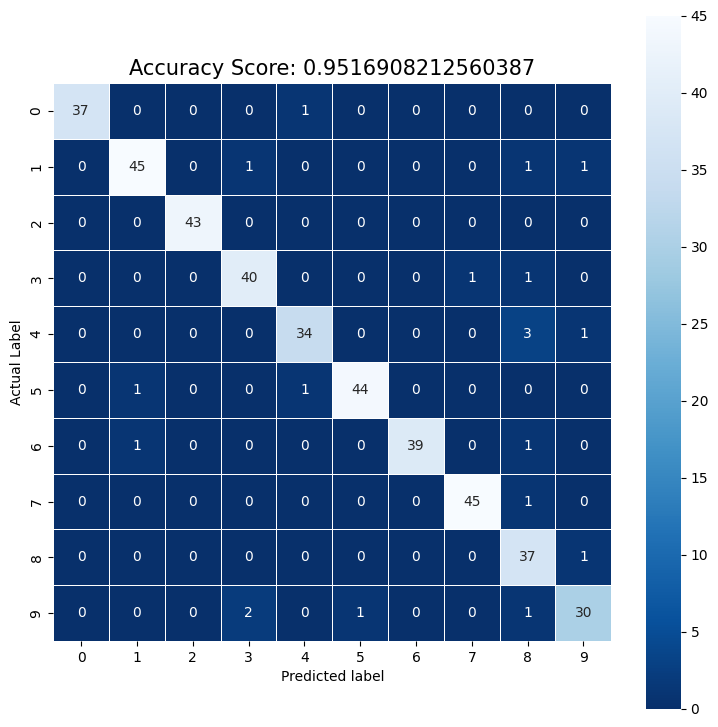

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, linewidths=0.5, square=True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

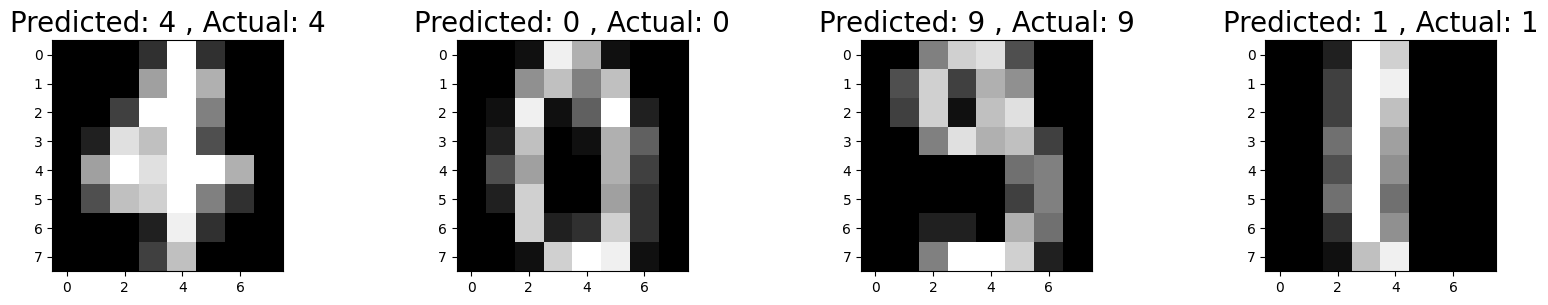

In [38]:
index = 0
classified_index = []

for predict, actual in zip(prediction, y_test):
  if predict == actual:
    classified_index.append(index)
  index += 1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classified_index[0:4]):
  plt.subplot(1,4, plotIndex+1)
  plt.imshow(np.reshape(X_test[wrong], (8, 8)), cmap=plt.cm.gray)
  plt.title('Predicted: {} , Actual: {}' .format(prediction[wrong], y_test[wrong]), fontsize=20)